### Importing required packages

In [200]:
#This block is for all the libraries that the program require.
import math
import en_core_web_sm
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import re, string, unicodedata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import inflect
import textstat
from gensim.test.utils import common_texts,get_tmpfile
from gensim.models import Word2Vec
import gensim
from nltk.tag import RegexpTagger
from collections import OrderedDict 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
from collections import Counter
from nltk.stem import PorterStemmer
import math
import numpy as np
import os 
from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from gensim.test.utils import common_texts,get_tmpfile
from gensim.models import Word2Vec
import gensim
from os import listdir
import itertools
import sklearn
import inflect
from pathlib import Path
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from lexicalrichness import LexicalRichness
import nltk
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import math
import en_core_web_sm
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import re, string, unicodedata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import inflect
import textstat
from gensim.test.utils import common_texts,get_tmpfile
from gensim.models import Word2Vec
import gensim
from nltk.tag import RegexpTagger
from collections import OrderedDict 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
from collections import Counter
from nltk.stem import PorterStemmer
import math
import numpy as np
import os 
from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from gensim.test.utils import common_texts,get_tmpfile
from gensim.models import Word2Vec
import gensim
from os import listdir
import itertools
import sklearn
import inflect
from pathlib import Path
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from lexicalrichness import LexicalRichness
import nltk
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')


### Function to load the data

In [18]:
def load_data(path_to_csv, path_to_books):
    
    data = pd.read_csv(path_to_csv,sep = ";", engine = 'python', header = 0, encoding = 'ISO-8859-1')
    data['book_id'] = data['book_id'].replace(regex=['.epub'],value= '-content.html')
    
    for i in range(len(data)):
        try:
            if((Path(path_to_books +'\\'+ str(data.loc[i,'book_id'])).stat().st_size)== 0):
                data = data.drop([i])
            else:
                fileContent = BeautifulSoup(open(path_to_books +'\\'+data.loc[i,'book_id'],encoding="ISO-8859-1"),'html.parser')
                data.loc[i,'content'] = fileContent.text
        except:
            continue

    data = data.reset_index(drop=True)
    data = data.dropna(axis = 0)
    data = data.replace(np.nan, 0)
    
    return(data)

### Function to preprocess the data

In [19]:
def preprocess(df):
    temp = pd.DataFrame(columns=['pp_text','pp_words'])
    for i in range(len(df)):
        print(i)
        text = str(df.iloc[i])
        
        #Tokenizing - still includes punctuations & special characters (eg: Â)
        words = nltk.word_tokenize(text)  
        
        #Lower case
        words = [word.lower() for word in words]
        
        #Removing stop words
        stop = set(stopwords.words('english'))
        words = [word for word in words if word not in stop] 
        
        #Removing everything except alphabets - Still includes unicode characters (eg:Â)
        words = [word for word in words if word.isalpha()] 
        words = [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in words] #Replaces with unicode with utf-8
        
        #Stemming
        stemmer    = PorterStemmer()
        stems = [stemmer.stem(word) for word in words]
        
        #Pre-processed text 
        sentence =''
        for word in stems:
            sentence= sentence+word+' '
            
        temp.loc[i] = (sentence,stems)
       
    return(temp)

### Loading & pre-processing the data

In [20]:
path_to_csv =  "D:\\Masters\\Semester II\\5 Advanced Topics in Machine Learning\\Project\\Data\\Gutenberg_English_Fiction_1k\\master996.csv"
path_to_books = "D:\\Masters\\Semester II\\5 Advanced Topics in Machine Learning\\Project\\Data\\Gutenberg_English_Fiction_1k\\Gutenberg_19th_century_English_Fiction"
data = load_data(path_to_csv,path_to_books)
#data.to_csv('Loaded_data.csv')
data

,Book_Name,book_id,guten_genre,Author_Name,content
0,The Mystery of the Boule Cabinet: A Detective ...,pg10067-content.html,Detective and Mystery,Stevenson| Burton Egbert,A Detective Story\nA.B.M. Fellow-Sherlockian\n...
1,The Pupil,pg1032-content.html,Literary,James| Henry,This edition first published 1916\nThe text fo...
2,At Love's Cost,pg10379-content.html,Literary,Garvice| Charles,"""Until this moment I have never fully realised..."
3,The Heart of the Range,pg10473-content.html,Western Stories,White| William Patterson,"""The Rider of Golden Bar,"" ""Hidden Trails,"" ""L..."
4,The Worshipper of the Image,pg10812-content.html,Literary,Gallienne| Richard Le,The Worshipper of the Image\nEvening was in th...
...,...,...,...,...,...
989,David Copperfield,pg766DickensDavidCopfld-content.html,Literary,Dickens| Charles,I do not find it easy to get sufficiently far ...
990,Hard Times,pg786DickensHardTimes-content.html,Literary,Dickens| Charles,The One Thing Needful\nMurdering the Innocents...
991,Memoirs of Shelock Holmes,pg834DoyleMemoirsSherlk-content.html,Detective and Mystery,Connan| Doyle,"""I am afraid, Watson, that I shall have to go,..."
992,The Mysterious Affair at Styles,pg863Agatha1-content.html,Detective and Mystery,Christie| Agatha,The intense interest aroused in the public by ...


In [138]:
preprocessed_data = preprocess(data['content'])
data = pd.concat([data,preprocessed_data], axis=1)
#data.to_csv("ATiML_Preprocessed_data.csv")

0
1


In [143]:
#data = pd.read_csv("C:\\Users\\calid\\Desktop\\ATiML_Preprocessed_data.csv") Calling Preprocessed data file
data

,Unnamed: 0,Book_Name,book_id,guten_genre,Author_Name,content,pp_text,pp_words
0,0,The Mystery of the Boule Cabinet: A Detective ...,pg10067-content.html,Detective and Mystery,Stevenson| Burton Egbert,A Detective Story\nA.B.M. Fellow-Sherlockian\n...,detect stori hello said took receiv desk answe...,"['detect', 'stori', 'hello', 'said', 'took', '..."
1,1,The Pupil,pg1032-content.html,Literary,James| Henry,This edition first published 1916\nThe text fo...,edit first publish text follow definit edit po...,"['edit', 'first', 'publish', 'text', 'follow',..."
2,2,At Love's Cost,pg10379-content.html,Literary,Garvice| Charles,"""Until this moment I have never fully realised...",moment never fulli realis great ass man think ...,"['moment', 'never', 'fulli', 'realis', 'great'..."
3,3,The Heart of the Range,pg10473-content.html,Western Stories,White| William Patterson,"""The Rider of Golden Bar,"" ""Hidden Trails,"" ""L...",rider golden bar hidden trail lynch lawyer own...,"['rider', 'golden', 'bar', 'hidden', 'trail', ..."
4,4,The Worshipper of the Image,pg10812-content.html,Literary,Gallienne| Richard Le,The Worshipper of the Image\nEvening was in th...,worshipp imag even wood still dream bracken se...,"['worshipp', 'imag', 'even', 'wood', 'still', ..."
...,...,...,...,...,...,...,...,...
989,989,David Copperfield,pg766DickensDavidCopfld-content.html,Literary,Dickens| Charles,I do not find it easy to get sufficiently far ...,find easi get suffici far away book first sens...,"['find', 'easi', 'get', 'suffici', 'far', 'awa..."
990,990,Hard Times,pg786DickensHardTimes-content.html,Literary,Dickens| Charles,The One Thing Needful\nMurdering the Innocents...,one thing need murder innoc loophol bounderbi ...,"['one', 'thing', 'need', 'murder', 'innoc', 'l..."
991,991,Memoirs of Shelock Holmes,pg834DoyleMemoirsSherlk-content.html,Detective and Mystery,Connan| Doyle,"""I am afraid, Watson, that I shall have to go,...",afraid watson shall go said holm sat togeth br...,"['afraid', 'watson', 'shall', 'go', 'said', 'h..."
992,992,The Mysterious Affair at Styles,pg863Agatha1-content.html,Detective and Mystery,Christie| Agatha,The intense interest aroused in the public by ...,intens interest arous public known time style ...,"['intens', 'interest', 'arous', 'public', 'kno..."


### Visualizing class distribution 

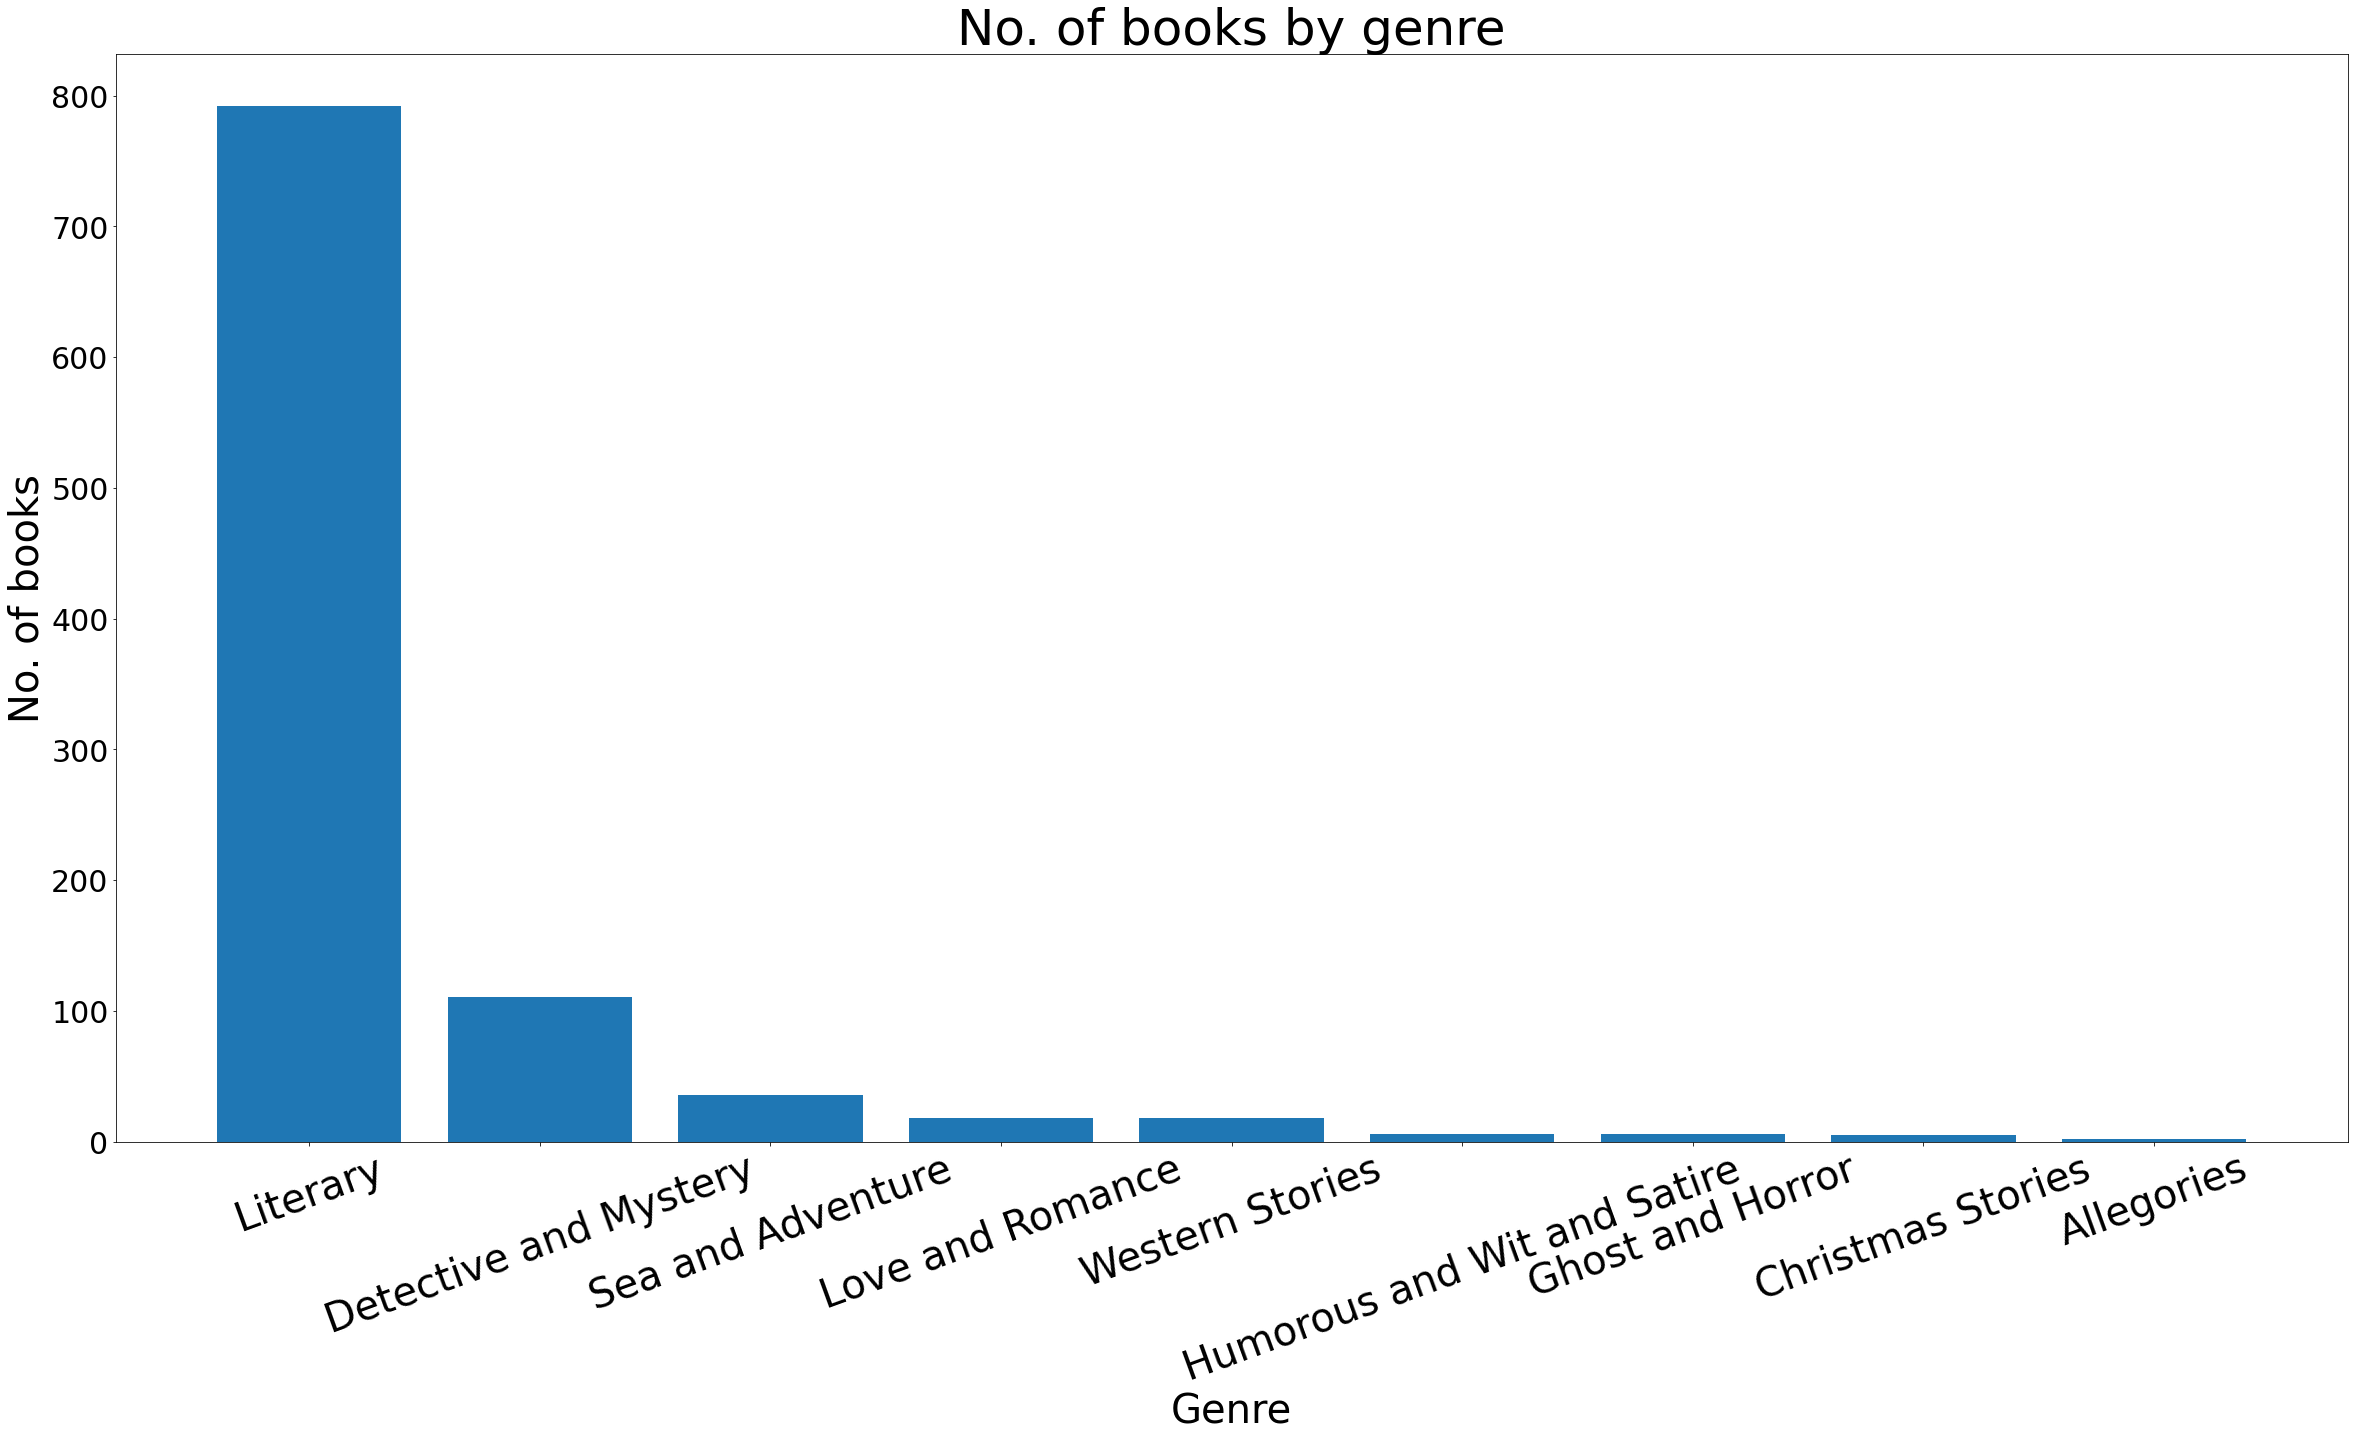

In [34]:
x = data['guten_genre'].value_counts().index.tolist()
y = data['guten_genre'].value_counts().values.tolist()

index = np.arange(len(x))
plt.bar(index, y)
plt.xlabel('Genre', fontsize=40)
plt.ylabel('No. of books', fontsize=40)
plt.xticks(index, x, fontsize=40, rotation=20)
plt.yticks(fontsize=30)
plt.title('No. of books by genre', fontsize = 50)
plt.rcParams["figure.figsize"] = (40,20)
plt.show()

### Function to extract textual features

In [125]:
def get_text_features(df):
    writing_style = pd.DataFrame()
    for i in df.index:
        print("Text Features for: ", i)
        
        test_sent = df.loc[i,'content']
        
        nltk_tagged_text = nltk.pos_tag(test_sent)
        
        regexp_tagger = RegexpTagger([ 
                 #Female pronouns
                (r'(She|she|her|Her)$', 'female_pronoun') ,  

                 #Male pronouns
                (r'(he|HIM|him|his|HIS|Him|His|He)$', 'male_pronoun'),

                #Personal Pronoun
                (r'(I|i|you|You|It|it|We|we|They|they)$', 'personal_pronoun'), 

                #Possessive Pronoun   
                (r'(Mine|Mine|yours|Yours|Hers|hers|Theirs|theirs|their|Their|Its|its|Ours|ours|Ones)$', 'possessive_pronoun'), 

                #Interjection
                (r'(aha|ahem|ahh|ahoy|alas|arg|aw|bam|bingo|blah|boo|bravo|brrr|cheers|congratulations|dang|drat|darn|duh|eek|eh|encore|eureka|fiddlesticks|gadzooks|gee|gee|whiz|golly|goodbye|good|grief|gosh|Shh|Please|please|Psst|Shoo|Hey|Oh|Yo|Here|Ahem|Encore|Hush|Scat|No|Silence|Enough|Yuck|Eww|Aww|Ouch|Oh|Ah|Ugh|Phew|Phooey|Rats|Yippee|Aw|Blah|Brr|Eek|Good|Grief|Alas|Bingo|Bravo|Eureka|Crikey|Gee|Golly|Gosh|Hmm|Holy|cow|Aha|Oh|Huh|Duh|Ahh|Well)$','interjection') , 

                (r':','colon'),     #Colon
                (r';','semi_colon'),#Semi-colon    
                (r'-', 'hyphen'),   #Hypen
                (r',','comma'),     #Comma

                (r'(.*)','r')

                ])
        li=[]
        tags = regexp_tagger.tag(nltk.word_tokenize(test_sent))
        frequency = nltk.FreqDist(tag for (word, tag) in tags)
        sorted_items = dict(sorted(frequency.items())) 
        li.append(sorted_items.values())
        writing_style = writing_style.append(li)
        writing_style = writing_style.reset_index(drop=True)

        
        #Period
        writing_style.loc[i,'period'] = test_sent.count('.')
        
        #Co-ordinating conjunction
        coord_conj = len([item for item in nltk_tagged_text if 'CC' in item])
        writing_style.loc[i,'coord_conj'] = coord_conj
        
        #Sub-ordinating conjunction
        sub_conj = len([item for item in nltk_tagged_text if 'IN' in item])
        writing_style.loc[i,'sub_conj'] = sub_conj

        #No. of punctuations
        punctuation = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
        counts = Counter(test_sent)
        punctuation_counts = {k:v for k, v in counts.items() if k in punctuation}
        writing_style.loc[i,'punctuation'] = sum(punctuation_counts.values())

        #No. of sentences
        tokenized_sents = sent_tokenize(test_sent)
        writing_style.loc[i,'no_sentences'] = len(tokenized_sents)

        #Lexical Richness - Type token ratio
        lex = LexicalRichness(test_sent)
        writing_style.loc[i,'lex_richness'] = lex.ttr

        #Flesch score 
        writing_style.loc[i,'flesch_score'] = textstat.flesch_reading_ease(test_sent)

        
        #No. of characters
        nlp = en_core_web_sm.load()
        nlp.max_length = 10000000
        stemmer = PorterStemmer()
        
        doc = nlp(test_sent)
        taggings = pd.DataFrame([(ent.text, ent.label_) for ent in doc.ents])
        taggings.columns = ['name','tag']
        tags = taggings[taggings.tag=="PERSON"]
        counts = dict(Counter(tags.name))
        chars = []
        for val in counts:
            if(counts[val]>1):
                chars.append(val)     
        if(len(chars)!=0):
            word_set = set()
            FILENAME_PARSE_REGEX = "(.)( )(.)()(.)*"
            words_s = sorted(np.unique(chars), key=len,reverse=True)
            words_df = pd.Series(words_s)
            words_df = words_df.drop_duplicates()
            words_s = words_df[words_df.str.match(FILENAME_PARSE_REGEX)]
            new_set = set()
            doc_Set = {}
            new_word = words_df
            for w in words_s:
                doc_Set[w] = []
                for nw in new_word:
                    if(nw in w):
                        doc_Set[w].append(nw)
            all_words = []
            for wa in doc_Set:
                all_words.append(doc_Set[wa][1:])
            conts = list(itertools.chain(*all_words))
            new_word = (set(new_word) - set(conts))
        
            characters = new_word
            writing_style.loc[i,'no_characters'] = len(characters)
        else:
            writing_style.loc[i,'no_characters'] = 0
            
        #Sentiment 
        analyser = SentimentIntensityAnalyzer()
        x =  nltk.word_tokenize(test_sent)
        words_Sent = np.unique(x)
        num = len(np.unique(words_Sent))
        words_Sent = random.sample(list(words_Sent), int(num))
        temp = ' '.join(map(str,words_Sent))
        sent = analyser.polarity_scores(temp)
        writing_style.loc[i,'neg'] = sent['neg']
        writing_style.loc[i,'neu'] = sent['neu']
        writing_style.loc[i,'pos'] = sent['pos']
        writing_style.loc[i,'compound'] = sent['compound']
        
        #Book length
        writing_style.loc[i,'book_length'] = len(test_sent)
                
    
    writing_style = writing_style.drop([8], axis=1)    
    writing_style.columns = ['colon','comma','female_pronoun','hyphen','interjection','male_pronoun','personal_pronoun','possessive_pronoun','semi_colon','period','coord_conj','sub_conj','punctuation','no_sentences','lex_richness','flesch_score','no_characters','neg','neu','pos','compound','book_length']    
    return (writing_style)


In [126]:
def scaling(df):
    temp = df.loc[:,'lex_richness':]
    only_text_df = df.loc[:,:'no_sentences']
    len_data = df['book_length']
    only_text_df = only_text_df.T/len_data
    only_text_df = only_text_df.T
    merged_df = pd.merge(temp,only_text_df,how='inner',left_index=True,right_index=True)
    merged_df = merged_df.dropna()
    merged_df = merged_df.drop("book_length",axis = 1)
    return(merged_df)

### Function to extract word vectors

In [127]:
def get_wordvectors(df):    
    word_vectors = pd.DataFrame()
    for i in df.index:
        word2veca = gensim.models.Word2Vec([df.loc[i,'pp_words']] ,min_count = 1, size = 15, window = 8, sg=1)
        print("Word vector for :", i)
        words = pd.DataFrame(word2veca.wv.vectors, index=word2veca.wv.index2word)
        words = words.values.sum(axis = 0) / words.shape[0]

        word_vectors.loc[:,i] = words

    wordVecs = word_vectors.T
    wordVecs.reset_index(level=0, inplace=True, drop=True)
    return (wordVecs)

### Extracting Features

In [153]:
text_features = get_text_features(data)
text_features['label'] = data['guten_genre']
text_features = scaling(text_features)
y = text_features['label']
word_vectors  = get_wordvectors(data)
text_features = text_features.drop('label',axis=1)
all_features  = pd.concat([text_features, word_vectors], axis=1)
all_features = all_features.drop("neg",axis = 1)
all_features = all_features.drop("neu",axis = 1)
all_features = all_features.drop("pos",axis = 1)
all_features = all_features.drop("compound",axis = 1)
#all_features.to_csv('ATiML_Features.csv')

Text Features for:  0
Word vector for : 0


In [162]:
#all_features = pd.read_csv('C:\\Users\\calid\\Downloads\\ATiML_Features.csv') Calling extracted feature file

In [169]:
label = y
features = all_features

,lex_richness,flesch_score,no_characters,0,1,2,3,4,5,6,...,interjection,male_pronoun,personal_pronoun,possessive_pronoun,semi_colon,period,coord_conj,sub_conj,punctuation,no_sentences
0,0.077625,73.00,46,0.176137,0.043654,0.225589,0.186559,0.224590,0.045720,-0.306806,...,0.000711,0.007085,0.014061,0.000336,0.001502,0.011755,0.008891,0.007760,0.050706,0.013588
1,0.164850,-6.21,7,0.341992,0.091012,0.157297,0.122550,0.156592,0.170654,-0.230456,...,0.000697,0.008369,0.009449,0.001060,0.001292,0.008309,0.009631,0.008561,0.036183,0.003533
2,0.058149,78.42,88,0.255059,0.234618,0.294984,0.124156,0.278912,0.087575,-0.166695,...,0.000840,0.007011,0.011519,0.000417,0.002264,0.008877,0.008746,0.007585,0.043992,0.011059
3,0.077797,87.65,139,0.325967,0.099938,0.200346,0.262815,-0.050363,0.361548,-0.061466,...,0.001104,0.007159,0.012644,0.000279,0.000014,0.015432,0.010454,0.007851,0.057630,0.018021
4,0.141378,74.42,9,0.355452,0.017293,0.355250,0.141865,0.155253,0.182941,-0.326401,...,0.000646,0.005415,0.007633,0.000760,0.000656,0.008998,0.007123,0.008258,0.038448,0.011091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,0.040938,72.80,216,0.390582,0.134234,0.182186,0.234085,0.187636,0.215388,-0.284510,...,0.000482,0.004235,0.011861,0.000341,0.001815,0.009443,0.006418,0.008481,0.045560,0.010209
966,0.082557,35.14,80,0.326207,0.082561,0.206598,0.072535,0.013894,0.278748,-0.225591,...,0.000496,0.005325,0.008714,0.000517,0.001495,0.010111,0.008951,0.008603,0.046423,0.004586
967,0.083195,70.57,96,0.344762,0.121796,0.200888,0.170859,0.221032,0.112228,-0.379252,...,0.000599,0.005994,0.011990,0.000355,0.000246,0.010582,0.007738,0.008549,0.039075,0.011753
968,0.090911,80.72,67,0.285546,0.057336,0.213682,0.150271,0.240568,0.193992,-0.331132,...,0.001403,0.004536,0.013170,0.000255,0.000243,0.014484,0.009614,0.008921,0.052670,0.016927


### Training, testing & evaluating classifiers

### Base classifier: Bag Of Words

In [ ]:
#Splitting data 70:30 for base model - Bag of words
x_b_train, x_b_test, y_b_train, y_b_test = train_test_split(data['pp_text'], data['guten_genre'] ,test_size=0.3, random_state = 0, stratify=data['guten_genre'])

In [206]:
count_vectorizer = CountVectorizer()
x_train_counts = count_vectorizer.fit_transform(x_b_train)
x_test_counts = count_vectorizer.transform(x_b_test)

#Random forest
clf_forest = RandomForestClassifier().fit(x_train_counts,y_b_train)
predicted_forest = clf_forest.predict(x_test_counts)
print("Random Forest:", f1_score(y_b_test,predicted_forest,average="weighted"))
print(confusion_matrix(y_b_test,predicted_forest))

#SVM
clf_svm = svm.SVC().fit(x_train_counts,y_b_train)
predicted_svm = clf_svm.predict(x_test_counts)
print("SVM:", f1_score(y_b_test,predicted_svm,average="weighted"))
print(confusion_matrix(y_b_test,predicted_svm))

#Decision Tree
clf_trees = DecisionTreeClassifier(random_state = 0).fit(x_train_counts,y_b_train)
predicted_trees = clf_trees.predict(x_test_counts)
print("Decision Tree:", f1_score(y_b_test,predicted_trees,average="weighted"))
print(confusion_matrix(y_b_test,predicted_trees))


Random Forest: 0.742193434413114
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   4   0   0  29   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0 238   0   0   0]
 [  0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   0  10   0   1   0]
 [  0   0   0   0   0   5   0   0   0]]
SVM: 0.7282761693606834
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   2   0   0  31   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0 238   0   0   0]
 [  0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   0  10   0   1   0]
 [  0   0   0   0   0   5   0   0   0]]
Decision Tree: 0.7870757578526645
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0  18   0   0  12   2   1   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  2   0 

### Oversampling

In [203]:
#Splitting data 70:30 for oversampling
x_train, x_test, y_train, y_test = train_test_split(features, label ,test_size=0.4, random_state = 0, stratify =label)

In [204]:
my_new = pd.concat([x_train,y_train],axis = 1)
count_class_0, count_class_1,count_class_2,count_class_3,count_class_4,count_class_5,count_class_6,count_class_7 = my_new.label.value_counts()

# Divide by class
df_class_0 = my_new[my_new['label'] == 'Literary']
df_class_1 = my_new[my_new['label'] == 'Detective and Mystery']
df_class_2 = my_new[my_new['label'] == 'Sea and Adventure']
df_class_3 = my_new[my_new['label'] == 'Western Stories']
df_class_4 = my_new[my_new['label'] == 'Love and Romance']
df_class_5 = my_new[my_new['label'] == 'Humorous and Wit and Satire']
df_class_6 = my_new[my_new['label'] == 'Christmas Stories']
df_class_7 = my_new[my_new['label'] == 'Ghost and Horror']

               
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_2_over = df_class_2.sample(count_class_0, replace=True)
df_class_3_over = df_class_3.sample(count_class_0, replace=True)
df_class_4_over = df_class_4.sample(count_class_0, replace=True)
df_class_5_over = df_class_5.sample(count_class_0, replace=True)
df_class_6_over = df_class_6.sample(count_class_0, replace=True)
df_class_7_over = df_class_7.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over,df_class_2_over,df_class_3_over,df_class_4_over,df_class_5_over,df_class_6_over,df_class_7_over], axis=0)

y_train = df_test_over.loc[:,'label']
df_test_over = df_test_over.drop('label', axis = 1)
x_train = df_test_over

In [205]:
# Random forest for Features
clf_forest_t = RandomForestClassifier().fit(x_train,y_train)
predicted_forest_t = clf_forest_t.predict(x_test)
print("Random Forest for oversampling:", f1_score(y_test,predicted_forest_t, average = 'weighted'))
print(confusion_matrix(y_test,predicted_forest_t))

# SVM for Features
clf_svm_t = svm.SVC().fit(x_train,y_train)
predicted_svm_t = clf_svm_t.predict(x_test)
print("SVM for oversampling:",f1_score(y_test,predicted_svm_t, average = 'weighted'))
print(confusion_matrix(y_test,predicted_svm_t))

# Decision trees for Features
clf_trees_t = DecisionTreeClassifier(random_state = 0).fit(x_train,y_train)
predicted_trees_t = clf_trees_t.predict(x_test)
print("Decision Tree for oversampling:", f1_score(y_test,predicted_trees_t, average = 'weighted'))
print(confusion_matrix(y_test,predicted_trees_t))




Random Forest for oversampling: 0.7499188482462203
[[  0   0   0   0   2   0   0   0]
 [  0   9   0   0  35   0   0   0]
 [  0   0   0   0   3   0   0   0]
 [  0   0   0   0   2   0   0   0]
 [  0   2   0   0 307   0   0   0]
 [  0   0   0   0   7   0   0   0]
 [  0   0   0   0  14   0   0   0]
 [  0   0   0   0   7   0   0   0]]
SVM for oversampling: 0.07665868855201456
[[ 0  1  1  0  0  0  0  0]
 [23  7  1  2  0  9  2  0]
 [ 0  1  0  0  1  0  1  0]
 [ 1  0  0  0  0  1  0  0]
 [90 41 41 26 11 71 29  0]
 [ 2  0  2  1  1  1  0  0]
 [ 2  2  2  0  1  3  4  0]
 [ 0  1  1  3  0  1  1  0]]
Decision Tree for oversampling: 0.7181671013000814
[[  0   0   0   0   2   0   0   0]
 [  0  15   0   0  25   2   1   1]
 [  0   0   0   0   3   0   0   0]
 [  0   1   0   0   1   0   0   0]
 [  1  21   2   2 257   9   8   9]
 [  0   0   0   0   6   1   0   0]
 [  0   2   0   0   9   0   3   0]
 [  0   3   0   0   2   0   1   1]]


### Over and under sampling

In [192]:
#Splitting data into train & test set for over & under sampling
x_train, x_test, y_train, y_test = train_test_split(features, label ,test_size=0.3, random_state = 0, stratify =label)

In [193]:
X_train = pd.DataFrame(x_train)
X_test  = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train)

In [194]:
#Dividing by class 
df_literary = X_train[y_train['label'] == 'Literary']
df_detective = X_train[y_train['label'] == 'Detective and Mystery']
df_sea = X_train[y_train['label'] == 'Sea and Adventure']
df_western = X_train[y_train['label'] == 'Western Stories']
df_love = X_train[y_train['label'] == 'Love and Romance']
df_humour = X_train[y_train['label'] == 'Humorous and Wit and Satire']
df_ghost = X_train[y_train['label'] == 'Ghost and Horror']
df_christmas = X_train[y_train['label'] == 'Christmas Stories']

df_literary_under = df_literary.sample(200)
df_detective_under = df_detective.sample(200, replace=True)
df_sea_under = df_sea.sample(200, replace=True)
df_western_under = df_western.sample(200, replace=True)
df_love_under = df_love.sample(200, replace=True)
df_humour_under = df_humour.sample(200, replace=True)
df_ghost_under = df_ghost.sample(200, replace =True)
df_christmas_under = df_christmas.sample(200,replace=True)

df_literary_under['label']='Literary'
df_detective_under['label']= 'Detective and Mystery'
df_sea_under['label'] = 'Sea and Adventure'
df_western_under['label'] = 'Western Stories'
df_love_under['label'] = 'Love and Romance'
df_humour_under['label'] = 'Humorous and Wit and Satire'
df_ghost_under['label']= 'Ghost and Horror'
df_christmas_under['label'] = 'Christmas Stories'


x_train = pd.concat([df_literary_under, df_detective_under, df_sea_under, df_western_under,df_love_under,df_humour_under,df_ghost_under,df_christmas_under], axis=0)
y_train = x_train.iloc[:,-1]
x_train = x_train.loc[:, x_train.columns != 'label']

,lex_richness,flesch_score,no_characters,0,1,2,3,4,5,6,...,interjection,male_pronoun,personal_pronoun,possessive_pronoun,semi_colon,period,coord_conj,sub_conj,punctuation,no_sentences
241,0.103404,74.83,77,0.353005,0.031334,0.266742,0.291258,0.107168,0.135688,-0.273590,...,0.000606,0.002719,0.010839,0.000495,0.001082,0.011342,0.008865,0.008422,0.040935,0.012258
308,0.055831,69.75,143,0.314392,0.285866,0.327380,0.198964,0.170850,-0.092708,-0.143842,...,0.001216,0.004598,0.009194,0.000538,0.002624,0.009066,0.010237,0.007109,0.041786,0.010449
166,0.110809,70.36,21,0.298678,0.181499,0.258354,0.032056,0.112007,0.104328,-0.205890,...,0.000444,0.007908,0.007552,0.000556,0.001936,0.007708,0.008333,0.008454,0.027367,0.008415
231,0.077488,71.48,91,0.274089,0.238623,0.277804,0.037558,0.214122,0.181888,-0.187532,...,0.001043,0.004454,0.008591,0.000451,0.001845,0.009664,0.008829,0.009591,0.041946,0.010285
965,0.040938,72.80,216,0.390582,0.134234,0.182186,0.234085,0.187636,0.215388,-0.284510,...,0.000482,0.004235,0.011861,0.000341,0.001815,0.009443,0.006418,0.008481,0.045560,0.010209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0.066575,74.93,83,0.278043,0.069552,0.377777,0.173501,0.254519,0.041580,-0.238926,...,0.000660,0.005371,0.009690,0.000784,0.001989,0.009750,0.006619,0.007701,0.047341,0.011279
748,0.144221,79.30,58,0.377210,0.067938,0.310360,0.091775,0.154601,0.066959,-0.313363,...,0.000675,0.005155,0.008800,0.000904,0.000090,0.013753,0.008529,0.008320,0.037677,0.013225
748,0.144221,79.30,58,0.377210,0.067938,0.310360,0.091775,0.154601,0.066959,-0.313363,...,0.000675,0.005155,0.008800,0.000904,0.000090,0.013753,0.008529,0.008320,0.037677,0.013225
748,0.144221,79.30,58,0.377210,0.067938,0.310360,0.091775,0.154601,0.066959,-0.313363,...,0.000675,0.005155,0.008800,0.000904,0.000090,0.013753,0.008529,0.008320,0.037677,0.013225


In [202]:
# Random forest for Features
clf_forest_t = RandomForestClassifier().fit(x_train,y_train)
predicted_forest_t = clf_forest_t.predict(x_test)
print("Random Forest for over & under sampling:", f1_score(y_test,predicted_forest_t, average = 'weighted'))
print(confusion_matrix(y_test,predicted_forest_t))


# SVM for Features
clf_svm_t = svm.SVC().fit(x_train,y_train)
predicted_svm_t = clf_svm_t.predict(x_test)
print("SVM for over & under sampling:",f1_score(y_test,predicted_svm_t, average = 'weighted'))
print(confusion_matrix(y_test,predicted_svm_t))


# Decision trees for Features
clf_trees_t = DecisionTreeClassifier(random_state = 0).fit(x_train,y_train)
predicted_trees_t = clf_trees_t.predict(x_test)
print("Decision Tree for over & under sampling:", f1_score(y_test,predicted_trees_t, average = 'weighted'))
print(confusion_matrix(y_test,predicted_trees_t))

Random Forest for over & under sampling: 0.7773915676630937
[[  0   0   0   0   1   0   0   0]
 [  0  19   0   0  12   0   0   2]
 [  0   0   0   0   2   0   0   0]
 [  0   1   0   0   1   0   0   0]
 [  0  17   0   0 214   0   0   1]
 [  0   0   0   0   5   0   0   0]
 [  0   0   0   0  10   0   1   0]
 [  0   1   0   0   3   0   1   0]]
SVM for over & under sampling: 0.07494767136517812
[[ 0  1  0  0  0  0  0  0]
 [ 0 17  4  3  0  1  2  6]
 [ 1  0  1  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 4 76 40 26  6  8 41 31]
 [ 0  3  1  0  0  0  0  1]
 [ 1  1  3  0  1  0  4  1]
 [ 0  0  1  2  0  0  2  0]]
Decision Tree for over & under sampling: 0.5938574777758362
[[  0   0   0   0   0   0   1   0]
 [  0  13   0   0  10   2   5   3]
 [  0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   1   1   0]
 [  2  50   4   4 137   8  17  10]
 [  0   2   1   1   0   0   1   0]
 [  0   0   0   0   9   0   2   0]
 [  0   2   0   0   1   0   1   1]]


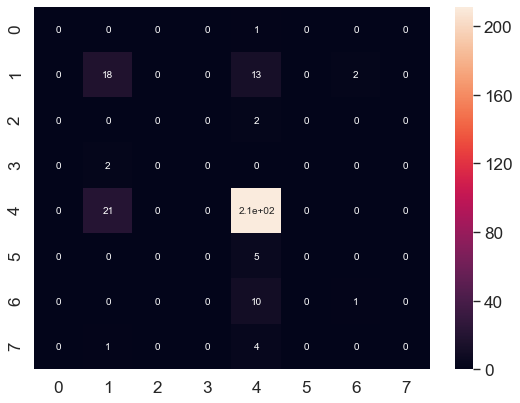

In [198]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
array=sklearn.metrics.confusion_matrix(y_test, predicted_forest_t)
df_cm = pd.DataFrame(array, range(8), range(8))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 9}) # font size
plt.show()


### References

https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html
https://stackoverflow.com/questions/27496014/does-it-make-sense-to-use-both-countvectorizer-and-tfidfvectorizer-as-feature-ve
https://www.nltk.org/book/ch06.html
https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/
https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis
https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html
https://www.kaggle.com/albeffe/text-clustering-tfidf-pca-beginner-tutorial/comments
https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a
https://medium.com/james-blogs/handling-imbalanced-data-in-classification-problems-7de598c1059f
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4775724/
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/
https://towardsdatascience.com/text-classification-in-python-dd95d264c802
https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/
https://www.nltk.org/book/ch06.html
https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html
https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
https://kite.com/blog/python/smote-python-imbalanced-learn-for-oversampling/
https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/#:~:text=SMOTE%20(synthetic%20minority%20oversampling%20technique)%20is%20one%20of%20the%20most,instances%20between%20existing%20minority%20instances.
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
https://scikit-learn.org/stable/modules/preprocessing.html
https://blog.revolutionanalytics.com/2016/04/pride-and-prejudice-and-z-scores.html
https://towardsdatascience.com/upsampling-with-smote-for-classification-projects-e91d7c44e4bf
https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f